In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load file
df_cholesterol = pd.read_csv('./datasets/cholesterol_dataset.csv')

In [10]:
# Check file
df_cholesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   blood_type         996 non-null    object 
 1   smoker             997 non-null    object 
 2   activity_level     996 non-null    object 
 3   age                997 non-null    float64
 4   weight             997 non-null    float64
 5   height             997 non-null    float64
 6   cholesterol_level  1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [6]:
# Remove Id column
df_cholesterol.drop(columns=['Id'], axis=1, inplace=True)

In [9]:
# Rename columns
df_cholesterol.columns = [
  "blood_type",
  "smoker",
  "activity_level",
  "age",
  "weight",
  "height",
  "cholesterol_level"
]

In [11]:
# Copy DF to EDA DF
df_cholesterol_eda =  df_cholesterol.copy()

In [12]:
# Copy DF to Bucketing DF
df_cholesterol_bucketing =  df_cholesterol.copy()

### EDA

In [13]:
# Visualize data
df_cholesterol_eda.head(10)

,blood_type,smoker,activity_level,age,weight,height,cholesterol_level
0,B,Yes,Low,33.0,85.1,186.0,199.63
1,A,No,Moderate,68.0,105.0,184.0,236.98
2,O,No,High,25.0,64.8,180.0,161.79
3,A,No,High,43.0,120.2,167.0,336.24
4,AB,No,Low,79.0,88.5,175.0,226.23
5,B,No,Low,68.0,66.8,170.0,185.31
6,A,Yes,Low,60.0,117.3,181.0,289.33
7,O,Yes,Moderate,35.0,86.9,174.0,216.48
8,O,No,Low,62.0,81.3,166.0,235.30
9,B,Yes,High,44.0,32.7,165.0,97.79


In [16]:
df_cholesterol_eda.activity_level.unique()

array(['Low', 'Moderate', 'High', nan], dtype=object)

In [28]:
df_cholesterol_eda.isna().sum()

blood_type           0
smoker               0
activity_level       0
age                  0
weight               0
height               0
cholesterol_level    0
dtype: int64

In [18]:
# Metrics of the DF
df_cholesterol_eda.describe()

,age,weight,height,cholesterol_level
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [19]:
# Collect metrics from categorical variables
mode_blood_type = df_cholesterol_eda.blood_type.mode()
mode_smoker = df_cholesterol_eda.smoker.mode()
mode_activity_level = df_cholesterol_eda.activity_level.mode()

In [20]:
# Collect metrics from numeric variables
median_age = df_cholesterol_eda.age.median()
median_weight = df_cholesterol_eda.weight.median()
median_height = df_cholesterol_eda.height.median()

In [27]:
# Input missing values
df_cholesterol_eda.fillna(value={'blood_type': mode_blood_type[0],
                                 'smoker': mode_smoker[0],
                                 'activity_level': mode_activity_level[0],
                                 'age': median_age,
                                 'weight': median_weight,
                                 'height': median_height,
                                 }, inplace=True)

In [29]:
# Convert age and height to integer
df_cholesterol_eda.age = df_cholesterol_eda.age.astype(int)
df_cholesterol_eda.height = df_cholesterol_eda.height.astype(int)

In [38]:
# Dataframe structure
df_cholesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   blood_type         963 non-null    object 
 1   smoker             963 non-null    object 
 2   activity_level     963 non-null    object 
 3   age                963 non-null    int64  
 4   weight             963 non-null    float64
 5   height             963 non-null    int64  
 6   cholesterol_level  963 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 60.2+ KB


In [31]:
# Visualize data
df_cholesterol_eda.head(10)

,blood_type,smoker,activity_level,age,weight,height,cholesterol_level
0,B,Yes,Low,33,85.1,186,199.63
1,A,No,Moderate,68,105.0,184,236.98
2,O,No,High,25,64.8,180,161.79
3,A,No,High,43,120.2,167,336.24
4,AB,No,Low,79,88.5,175,226.23
5,B,No,Low,68,66.8,170,185.31
6,A,Yes,Low,60,117.3,181,289.33
7,O,Yes,Moderate,35,86.9,174,216.48
8,O,No,Low,62,81.3,166,235.30
9,B,Yes,High,44,32.7,165,97.79


<Axes: xlabel='age'>

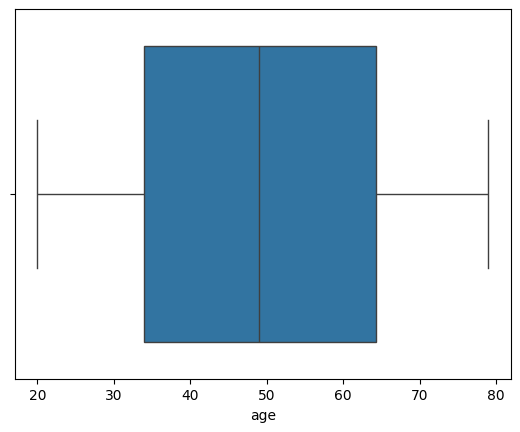

In [ ]:
# Verify / detect age outliers
sns.boxplot(data=df_cholesterol_eda, x='age')

<Axes: xlabel='weight'>

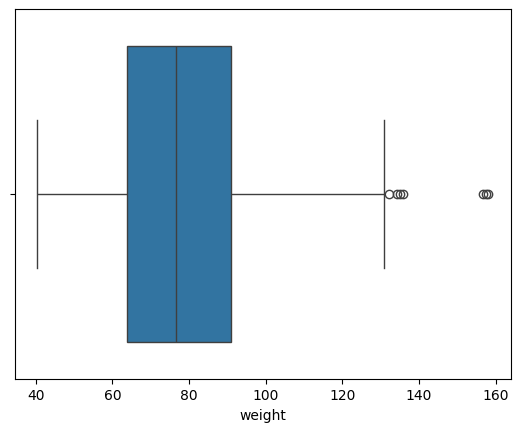

In [39]:
# Verify / detect weight outliers
sns.boxplot(data=df_cholesterol_eda, x='weight')

In [35]:
# Filter public to be removed
df_cholesterol_eda[df_cholesterol_eda['weight'] < 40].weight.count()

np.int64(37)

In [37]:
# Remove public
df_cholesterol_eda.drop(df_cholesterol_eda[df_cholesterol_eda['weight'] < 40].index, axis=0, inplace=True)

<Axes: xlabel='height'>

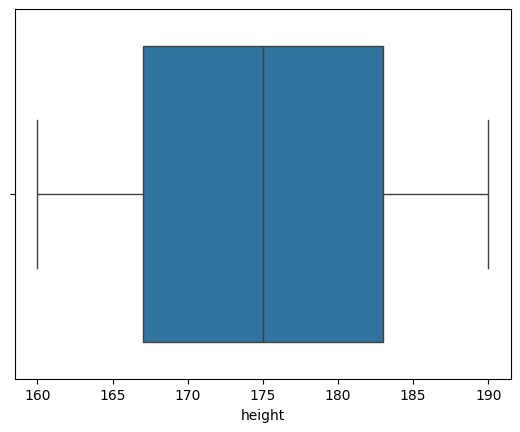

In [40]:
# Verify / detect height outliers
sns.boxplot(data=df_cholesterol_eda, x='height')

<Axes: xlabel='cholesterol_level'>

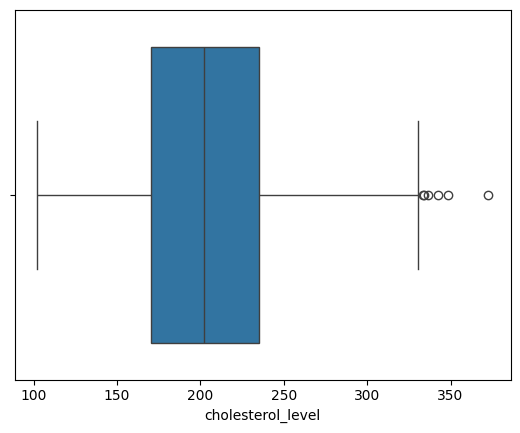

In [41]:
# Verify / detect cholesterol_level outliers
sns.boxplot(data=df_cholesterol_eda, x='cholesterol_level')

<Axes: xlabel='blood_type', ylabel='cholesterol_level'>

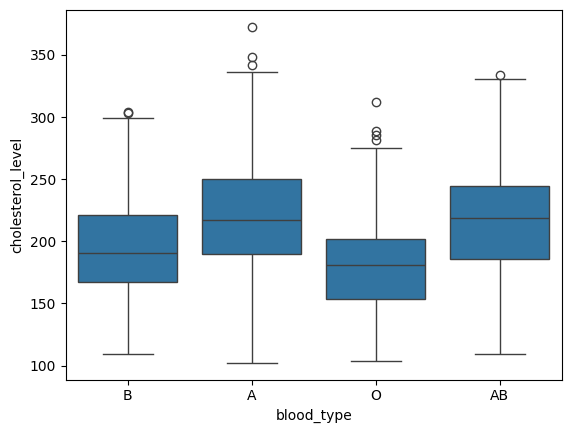

In [ ]:
# Categorical variables (Blood Type) X Cholesterol Level
sns.boxplot(data=df_cholesterol_eda, x='blood_type', y='cholesterol_level')

<Axes: xlabel='smoker', ylabel='cholesterol_level'>

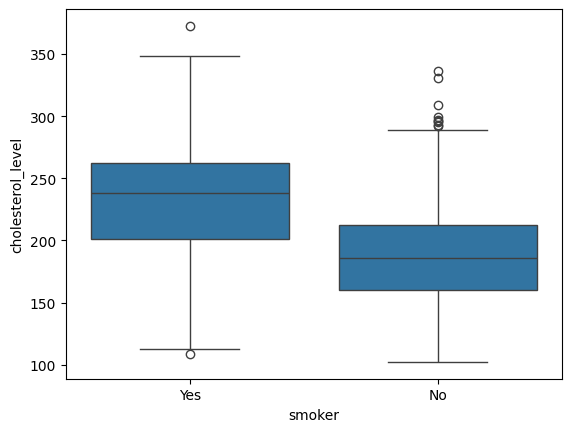

In [43]:
# Categorical variables (Smoker) X Cholesterol Level
sns.boxplot(data=df_cholesterol_eda, x='smoker', y='cholesterol_level')

<Axes: xlabel='activity_level', ylabel='cholesterol_level'>

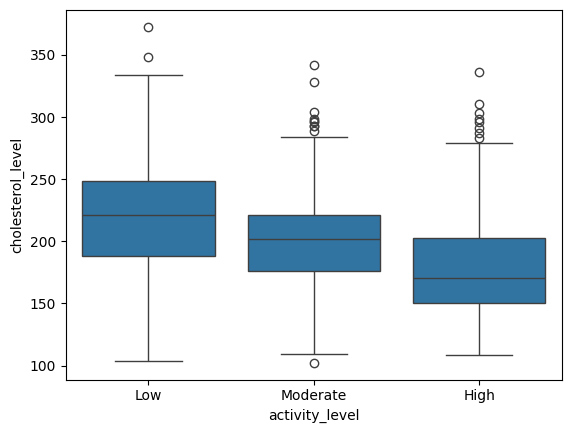

In [44]:
# Categorical variables (Activity Level) X Cholesterol Level
sns.boxplot(data=df_cholesterol_eda, x='activity_level', y='cholesterol_level')

<Axes: xlabel='age', ylabel='cholesterol_level'>

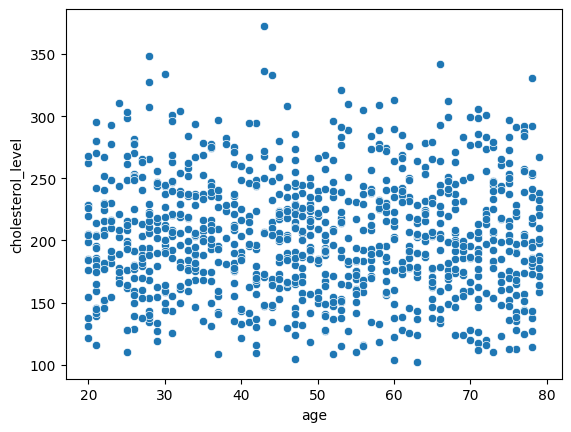

In [45]:
# Numeric variables (age) X Cholesterol Level
sns.scatterplot(data=df_cholesterol_eda, x='age', y='cholesterol_level')

<Axes: xlabel='weight', ylabel='cholesterol_level'>

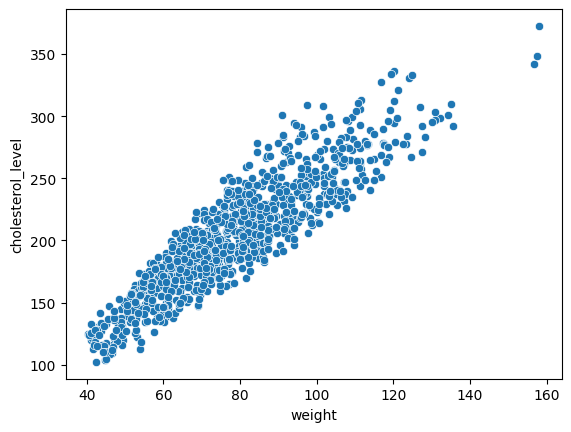

In [46]:
# Numeric variables (weight) X Cholesterol Level
sns.scatterplot(data=df_cholesterol_eda, x='weight', y='cholesterol_level')

<Axes: xlabel='height', ylabel='cholesterol_level'>

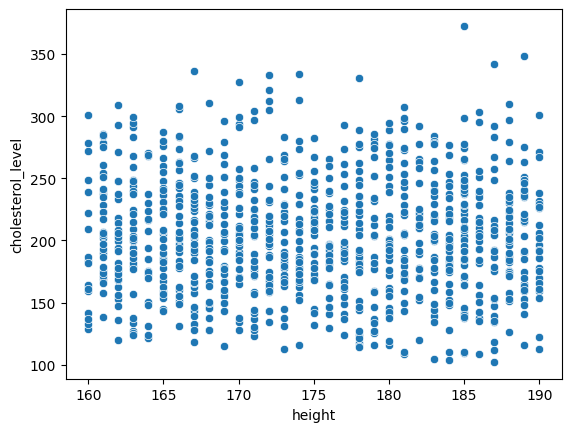

In [47]:
# Numeric variables (height) X Cholesterol Level
sns.scatterplot(data=df_cholesterol_eda, x='height', y='cholesterol_level')

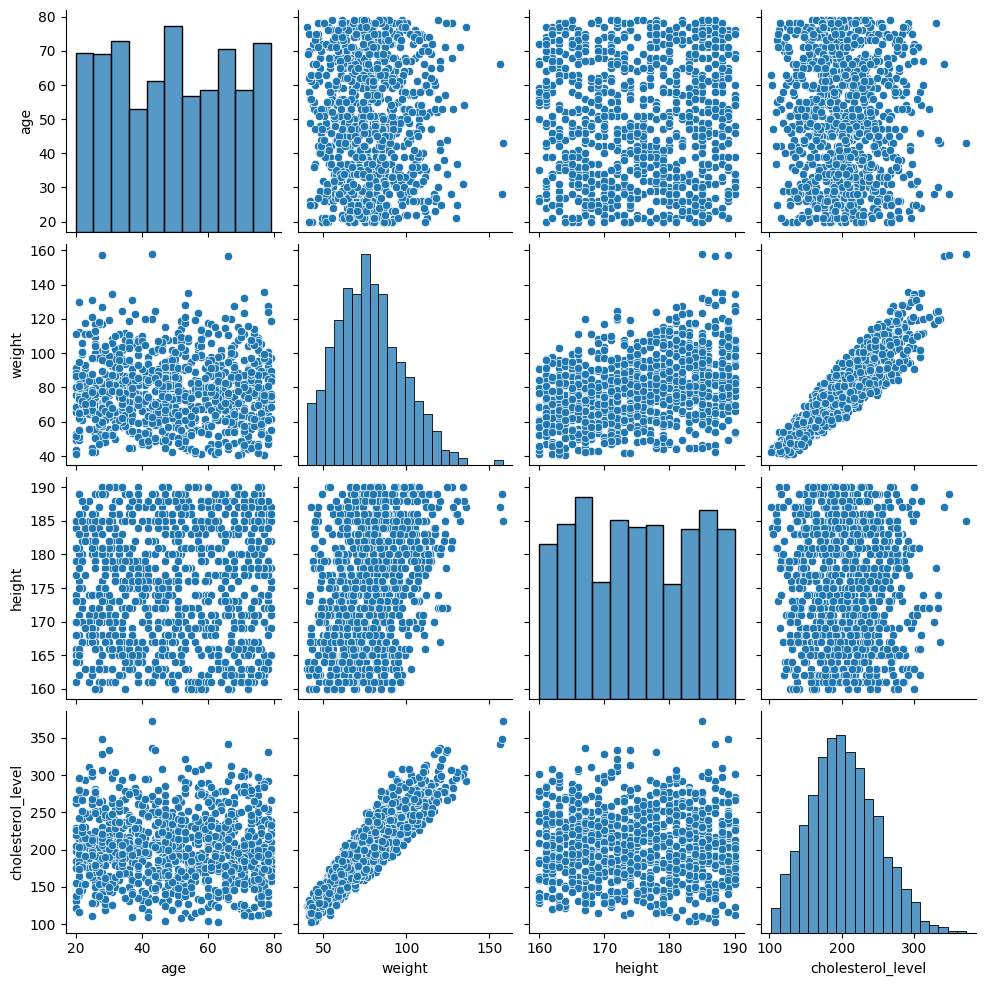

In [48]:
sns.pairplot(df_cholesterol_eda)

In [ ]:
# Convert nominal categorical variable to numerical, using One-Hot Encoder from Pandas
df_cholesterol_eda = pd.get_dummies(df_cholesterol_eda, columns=['blood_type', 'smoker'], dtype='int64')

In [52]:
df_cholesterol_eda.head(10)

,activity_level,age,weight,height,cholesterol_level,blood_type_A,blood_type_AB,blood_type_B,blood_type_O,smoker_No,smoker_Yes
0,1,33,85.1,186,199.63,0,0,1,0,0,1
1,2,68,105.0,184,236.98,1,0,0,0,1,0
2,3,25,64.8,180,161.79,0,0,0,1,1,0
3,3,43,120.2,167,336.24,1,0,0,0,1,0
4,1,79,88.5,175,226.23,0,1,0,0,1,0
5,1,68,66.8,170,185.31,0,0,1,0,1,0
6,1,60,117.3,181,289.33,1,0,0,0,0,1
7,2,35,86.9,174,216.48,0,0,0,1,0,1
8,1,62,81.3,166,235.30,0,0,0,1,1,0
10,1,57,123.6,183,283.87,1,0,0,0,0,1


In [51]:
# Convert ordinal categorical variable to numeric, using factorize from Pandas
df_cholesterol_eda['activity_level'] = pd.factorize(df_cholesterol_eda.activity_level)[0] + 1

<Axes: >

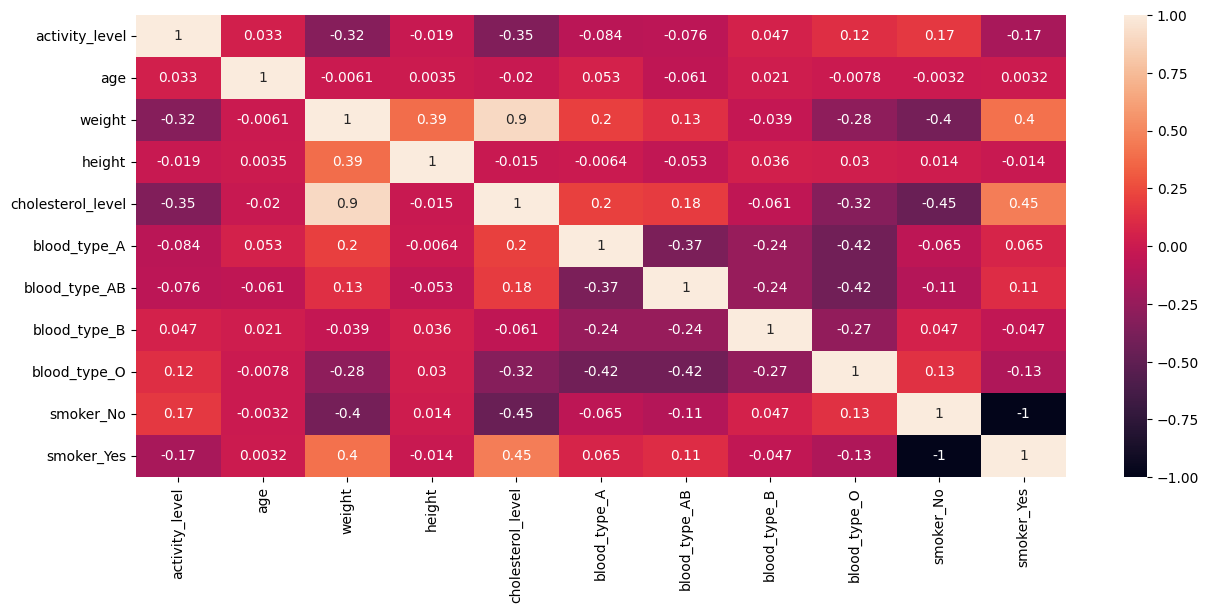

In [53]:
# Headmap with Correlation between values
plt.figure(figsize=(15,6))
sns.heatmap(df_cholesterol_eda.corr(), vmin=-1, vmax=1, annot=True)


<Axes: >

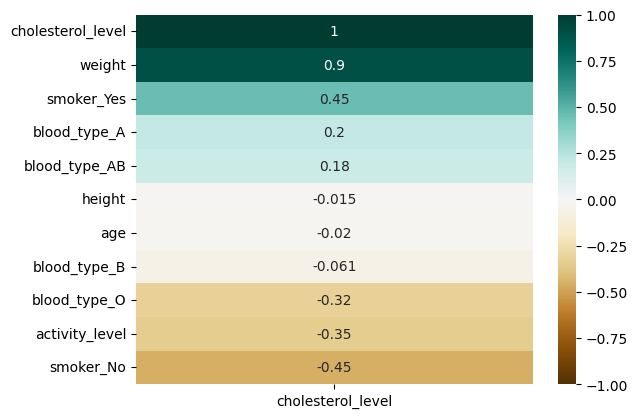

In [55]:
# Ranking format, just target correlation (cholesterol_level)
sns.heatmap(df_cholesterol_eda.corr()[['cholesterol_level']].sort_values(by='cholesterol_level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [62]:
# Bucketing - Age
bins_age = [20, 30, 40, 50, 60, 70, 80]
labels_age = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_cholesterol_bucketing['age_scale'] = pd.cut(x=df_cholesterol_bucketing['age'], bins=bins_age, labels=labels_age, include_lowest=True)


In [69]:
df_cholesterol_bucketing.head(10)

,blood_type,smoker,activity_level,age,weight,height,cholesterol_level,age_scale,weight_scale
0,B,Yes,Low,33.0,85.1,186.0,199.63,30-39,80-89
1,A,No,Moderate,68.0,105.0,184.0,236.98,60-69,100-109
2,O,No,High,25.0,64.8,180.0,161.79,20-29,60-69
3,A,No,High,43.0,120.2,167.0,336.24,40-49,120-129
4,AB,No,Low,79.0,88.5,175.0,226.23,70-79,80-89
5,B,No,Low,68.0,66.8,170.0,185.31,60-69,60-69
6,A,Yes,Low,60.0,117.3,181.0,289.33,50-59,110-119
7,O,Yes,Moderate,35.0,86.9,174.0,216.48,30-39,80-89
8,O,No,Low,62.0,81.3,166.0,235.30,60-69,80-89
9,B,Yes,High,44.0,32.7,165.0,97.79,40-49,NaN


<Axes: xlabel='age_scale', ylabel='cholesterol_level'>

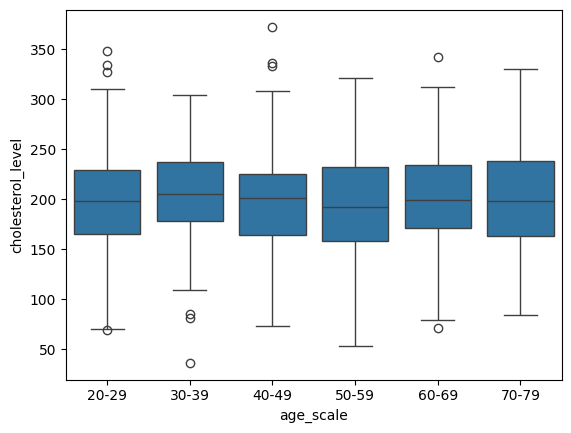

In [64]:
sns.boxplot(df_cholesterol_bucketing, x='age_scale', y='cholesterol_level')

In [66]:
# Bucketing - Age
bins_weight = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_weight = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-159']
df_cholesterol_bucketing['weight_scale'] = pd.cut(x=df_cholesterol_bucketing['weight'], bins=bins_weight, labels=labels_weight, include_lowest=True)


<Axes: xlabel='weight_scale', ylabel='cholesterol_level'>

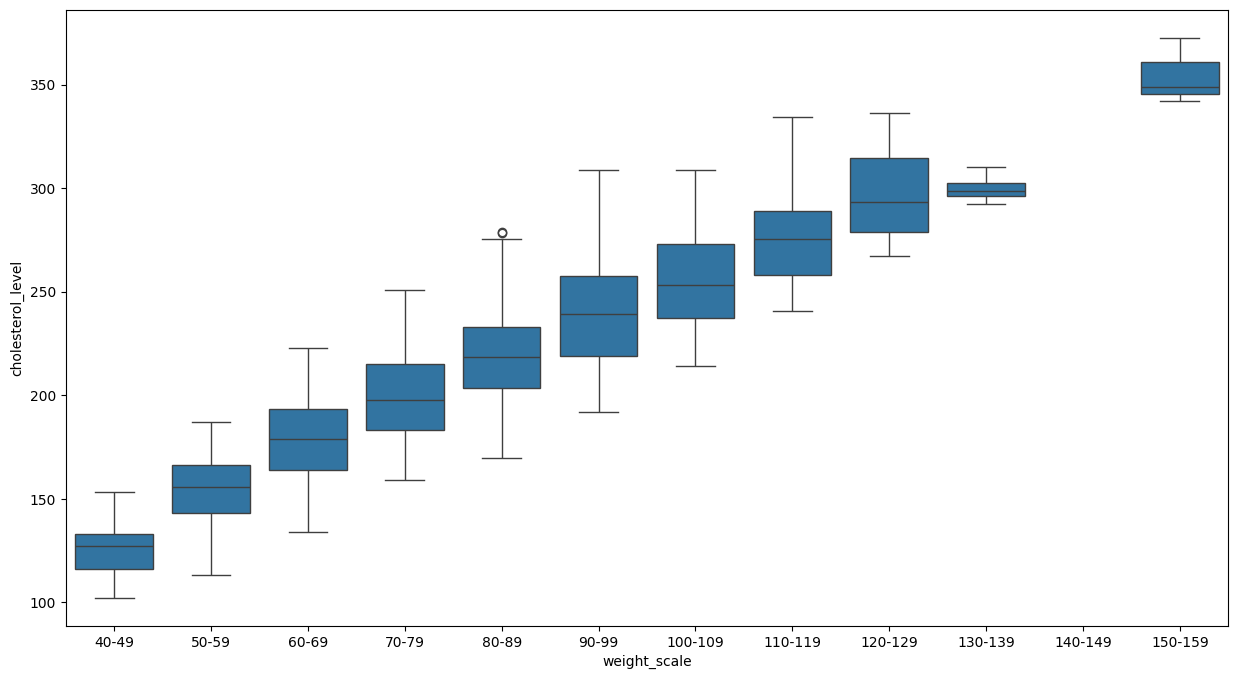

In [70]:
plt.figure(figsize=(15, 8))
sns.boxplot(df_cholesterol_bucketing, x='weight_scale', y='cholesterol_level')

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [74]:
# Create Train and Test Sets
df_cholesterol.drop(df_cholesterol[df_cholesterol['weight'] < 40].index, axis=0, inplace=True)

In [75]:
df_cholesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   blood_type         960 non-null    object 
 1   smoker             960 non-null    object 
 2   activity_level     959 non-null    object 
 3   age                960 non-null    float64
 4   weight             960 non-null    float64
 5   height             960 non-null    float64
 6   cholesterol_level  963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [76]:
X = df_cholesterol.drop(columns='cholesterol_level', axis=1)
y = df_cholesterol['cholesterol_level']

In [77]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [81]:
y_test.shape

(289,)

In [89]:
# Pipeline
# Impute mode to categorical variables - blood_type, smoker, activity_level
# Standardize numerical variables - age, height, weight
# OneHotEncode nominal categorical variables - blood_type, smoker
# OrdinalEncoder ordinal categorical variables - activity_level
# Impute median to missing numerical variables - age, height, weight

# Column names
categorical_columns = ['blood_type', 'smoker']
numeric_columns = ['age', 'height', 'weight']
ordinal_columns = ['activity_level']

In [85]:
# Categoricals Transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [86]:
# Ordinal Transformer
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Low', 'Moderate', 'High']], handle_unknown='error'))
])

In [88]:
# Numerical Transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [90]:
# Create ColumnTransformer which encapulates all the preprocessing steps
preprocessor = ColumnTransformer(
  transformers=[
    ('num', numeric_transformer, numeric_columns),
    ('cat', categorical_transformer, categorical_columns),
    ('ord', ordinal_transformer, ordinal_columns)
  ]
)

In [91]:
# Creating main Pipeline = preprocessing + training
model_regr = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

In [92]:
# Train Model
model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height', 'weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['blood_type', 'smoker']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Moderate',
                                                                                               'High']]))]),
                                                  ['activity_level'])])),
                ('regressor', LinearRegression())])

### Metrics Analysis

In [93]:
# Generate prediction
y_pred = model_regr.predict(X_test)

In [94]:
# Calculate R2 Score
r2_score(y_test, y_pred)

0.9594250724093464

In [95]:
# Calculate MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

7.313838031022507

In [101]:
# Calculate RMSE (Root Mean Squared Error)
root_mean_squared_error(y_test, y_pred)

9.09764924648704

### Residuals Analysis

In [102]:
# Calculate residuals
residuals = y_test - y_pred

In [103]:
# Transform residuals in default scale
# (X - average) / std
from scipy.stats import zscore
residuals_std = zscore(residuals)

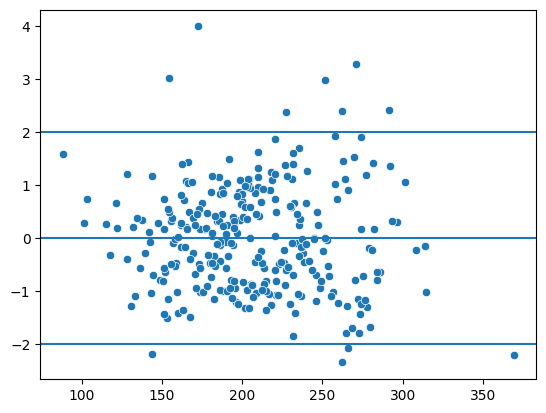

In [105]:
# If the residuals are balanced around -2 and 2, the model is linear

# Verify homogeneity of variance (homoscedasticity)
# If values are balance around the line, the model is homoscedastic
# if we have a tendency or pattern (forming a cone, funnel), the model is heteroscedastic
sns.scatterplot(x=y_pred, y=residuals_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

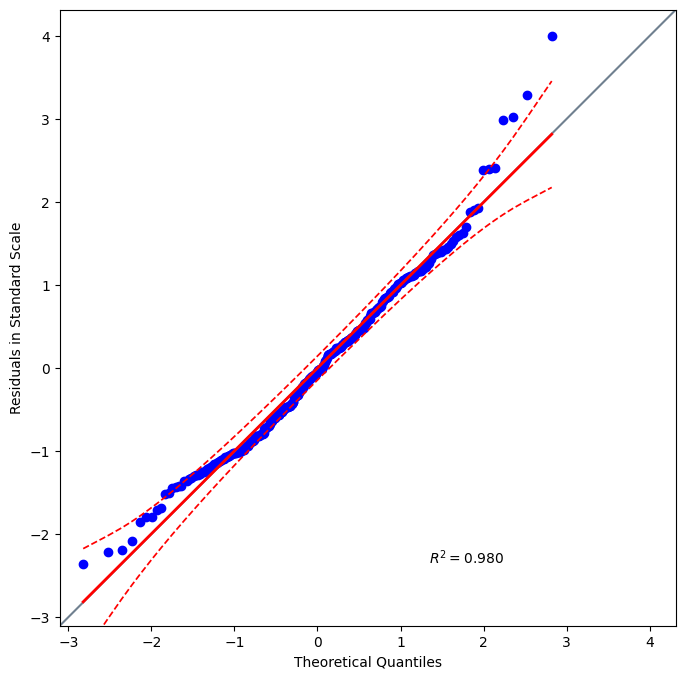

In [108]:
# Check if residuals follow a normal distribution
# QQ Plot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuals_std, dist='norm', confidence=0.95)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Residuals in Standard Scale')
plt.show()

In [109]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt
stat_shapiro, p_value_shapiro = shapiro(residuals)
print('Test Statistics: {} and P-Value: {}'.format(stat_shapiro, p_value_shapiro))

Test Statistics: 0.9807737729720729 and P-Value: 0.0006268860444489788


In [110]:
# Kolmogorov-Smirnov Test
stat_ks, p_value_ks = kstest(residuals, 'norm')
print('Test Statistics: {} and P-Value: {}'.format(stat_ks, p_value_ks))

Test Statistics: 0.42455920998485613 and P-Value: 8.925833190910163e-48


In [111]:
# Lilliefors Test
stat_ll, p_value_ll = lilliefors(residuals, dist='norm', pvalmethod='table')
print('Test Statistics: {} and P-Value: {}'.format(stat_ll, p_value_ll))

Test Statistics: 0.049553710301929066 and P-Value: 0.1253332372073598


In [112]:
# Anderson-Darling Test
stat_and, critical_and, significance_and = anderson(residuals, dist='norm')

In [113]:
critical_and

array([0.568, 0.647, 0.776, 0.906, 1.077])

In [114]:
significance_and

array([15. , 10. ,  5. ,  2.5,  1. ])

In [115]:
print('Test Statistics: {} and Critical Value: {}'.format(stat_and, critical_and[2]))

Test Statistics: 0.9169275158490109 and Critical Value: 0.776


In [116]:
# Goldfeld-Quandt Homoscedasticity Test
pipe = Pipeline(steps=[('preprocessor', preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

In [117]:
X_test_transformed

array([[-1.44340738, -0.58669129,  0.22608781, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28157488, -1.05685776, -1.20886474, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10973608, -0.35160806, -0.84754575, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.00250157, -1.52702423, -1.09014564, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.28056099, -0.35160806,  0.17447081, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.72545605, -1.17439938, -1.65277092, ...,  0.        ,
         1.        ,  0.        ]], shape=(289, 10))

In [118]:
test_goldfeld = het_goldfeldquandt(residuals, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print('Test Statistics: {} and P-Value: {}'.format(stat_goldfeld, p_value_goldfeld))

Test Statistics: 0.6716135765253544 and P-Value: 0.9893959472385482
